In [386]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

## **Reading and displaying the data**

In [387]:
data=pd.read_csv('/content/blood.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Unnamed: 0                                  748 non-null    int64 
 1    Months since Last Donation,                748 non-null    int64 
 2   no.of donations                             748 non-null    int64 
 3   Total Volume Donated (c.c.)                 748 non-null    int64 
 4   Months since First Donation                 748 non-null    int64 
 5   age                                         748 non-null    int64 
 6   mild diseases                               748 non-null    object
 7   hypertension_sugar_thyroid                  748 non-null    object
 8   whether he/she donated blood in March 2007  748 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 52.7+ KB


In [388]:
data.head()

,Unnamed: 0,"Months since Last Donation,",no.of donations,Total Volume Donated (c.c.),Months since First Donation,age,mild diseases,hypertension_sugar_thyroid,whether he/she donated blood in March 2007
0,456,2,50,12500,98,19,no,no,1
1,659,0,13,3250,28,45,yes,yes,0
2,276,1,16,4000,35,39,no,no,1
3,263,2,20,5000,45,32,no,no,1
4,303,1,24,6000,77,22,no,yes,0


# **Droping unnamed column**

In [389]:
data=data.drop(["Unnamed: 0"],axis=1)
data

,"Months since Last Donation,",no.of donations,Total Volume Donated (c.c.),Months since First Donation,age,mild diseases,hypertension_sugar_thyroid,whether he/she donated blood in March 2007
0,2,50,12500,98,19,no,no,1
1,0,13,3250,28,45,yes,yes,0
2,1,16,4000,35,39,no,no,1
3,2,20,5000,45,32,no,no,1
4,1,24,6000,77,22,no,yes,0
...,...,...,...,...,...,...,...,...
743,23,2,500,38,23,no,no,1
744,21,2,500,52,43,no,yes,0
745,23,3,750,62,32,no,no,1
746,39,1,250,39,19,yes,yes,0


# **Renaming all the column names**

In [390]:
data=data.rename({' Months since Last Donation,':'last_donation','no.of donations':'total_donations','Total Volume Donated (c.c.)':'volume','Months since First Donation':'start_Donation','whether he/she donated blood in March 2007':'Label'},axis=1)
data.head()

,last_donation,total_donations,volume,start_Donation,age,mild diseases,hypertension_sugar_thyroid,Label
0,2,50,12500,98,19,no,no,1
1,0,13,3250,28,45,yes,yes,0
2,1,16,4000,35,39,no,no,1
3,2,20,5000,45,32,no,no,1
4,1,24,6000,77,22,no,yes,0


In [391]:
data.dtypes

last_donation                  int64
total_donations                int64
volume                         int64
start_Donation                 int64
age                            int64
mild diseases                 object
hypertension_sugar_thyroid    object
Label                          int64
dtype: object

# **Encoding**

In [392]:
##print(data.mild diseases.unique())
mild_diseases_to_num={'yes':1,'no':0}
temp=data['mild diseases'].map(mild_diseases_to_num)
print(temp)
data['mild diseases']=temp

0      0
1      1
2      0
3      0
4      0
      ..
743    0
744    0
745    0
746    1
747    1
Name: mild diseases, Length: 748, dtype: int64


In [393]:
hyper_to_num={'yes':1,'no':0}
temp2=data['hypertension_sugar_thyroid'].map(hyper_to_num)
print(temp2)
data['hypertension_sugar_thyroid']=temp2

0      0
1      1
2      0
3      0
4      1
      ..
743    0
744    1
745    0
746    1
747    1
Name: hypertension_sugar_thyroid, Length: 748, dtype: int64


In [394]:
data.dtypes

last_donation                 int64
total_donations               int64
volume                        int64
start_Donation                int64
age                           int64
mild diseases                 int64
hypertension_sugar_thyroid    int64
Label                         int64
dtype: object

In [395]:
data.head()

,last_donation,total_donations,volume,start_Donation,age,mild diseases,hypertension_sugar_thyroid,Label
0,2,50,12500,98,19,0,0,1
1,0,13,3250,28,45,1,1,0
2,1,16,4000,35,39,0,0,1
3,2,20,5000,45,32,0,0,1
4,1,24,6000,77,22,0,1,0


In [396]:
data.describe()

,last_donation,total_donations,volume,start_Donation,age,mild diseases,hypertension_sugar_thyroid,Label
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.280749,34.462567,0.287433,0.330214,0.568182
std,8.095396,5.839307,1459.826781,24.377197,11.879806,0.452868,0.470605,0.495661
min,0.000000,1.000000,250.000000,2.000000,12.000000,0.000000,0.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,23.000000,0.000000,0.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,32.000000,0.000000,0.000000,1.000000
75%,14.000000,7.000000,1750.000000,50.000000,45.000000,1.000000,1.000000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,57.000000,1.000000,1.000000,1.000000


# Identified label as target variable 

In [397]:
data.Label.value_counts(normalize=True)

1    0.568182
0    0.431818
Name: Label, dtype: float64

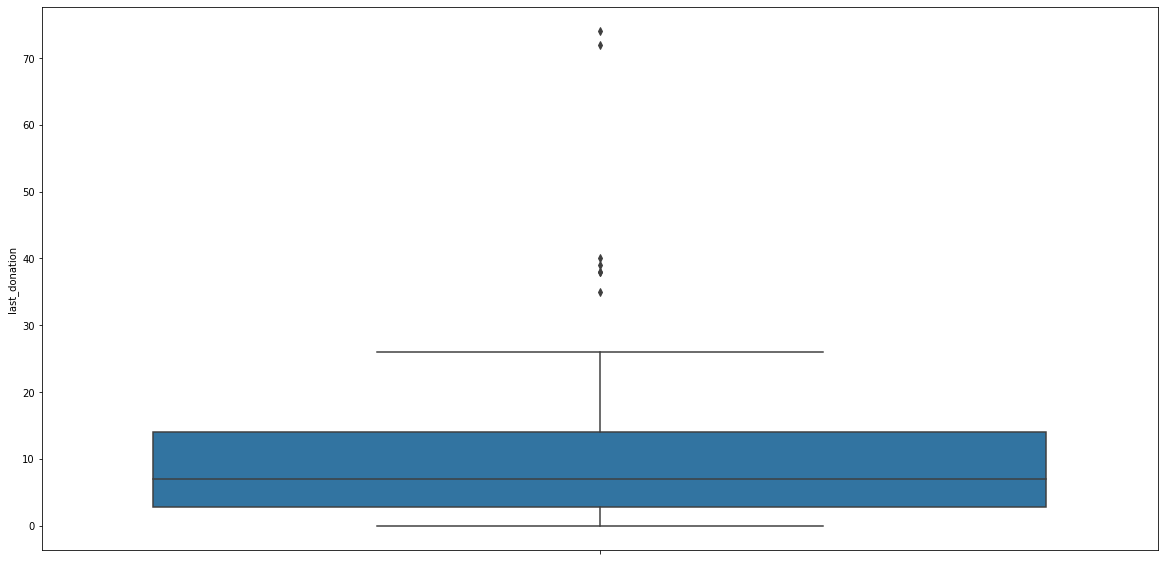

In [398]:
plt.figure(figsize=(20,10)) 
sb.boxplot(y="last_donation",data=data)

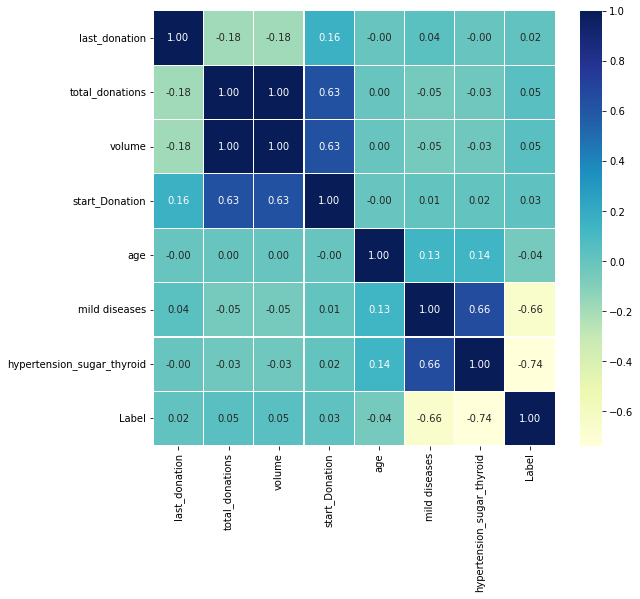

In [399]:
corrmat=data.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sb.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True)

# **Joint plot**

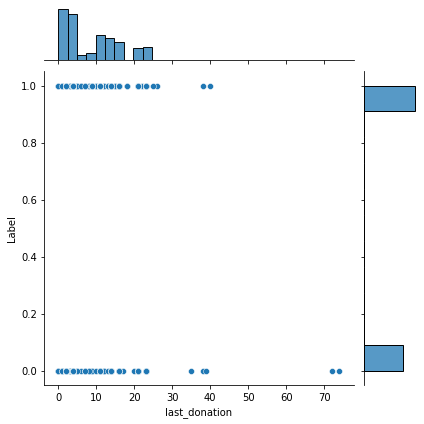

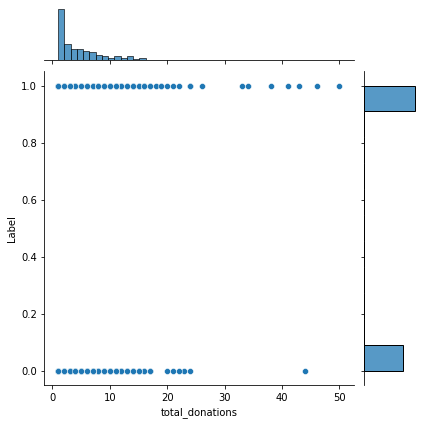

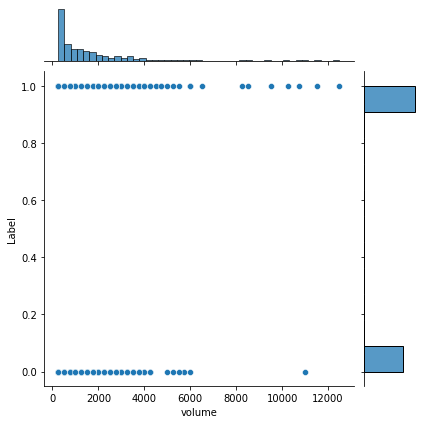

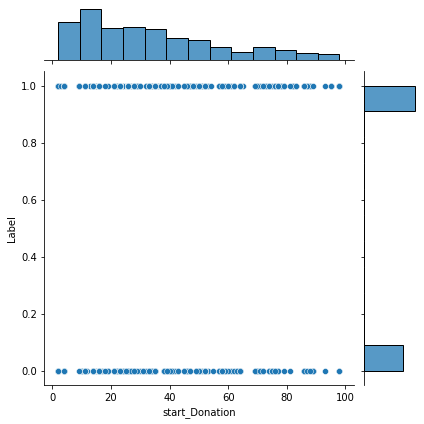

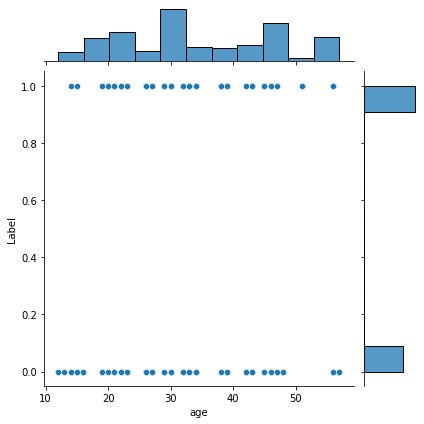

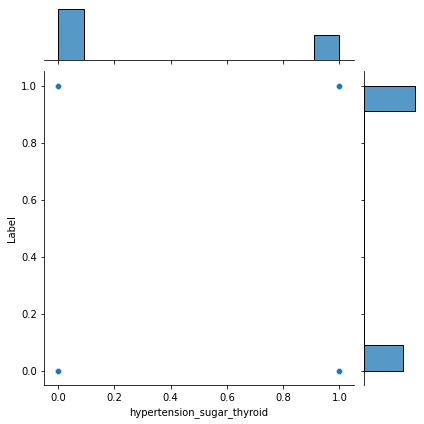

In [401]:
sb.jointplot(data.last_donation, data.Label)
plt.show()
sb.jointplot(data.total_donations, data.Label)
plt.show()
sb.jointplot(data.volume, data.Label)
plt.show()
sb.jointplot(data.start_Donation, data.Label)
plt.show()
sb.jointplot(data.age, data.Label)
plt.show()
sb.jointplot(data.hypertension_sugar_thyroid, data.Label)
plt.show()


# **Spliting data for training and testing**

In [402]:
X = data.drop("Label", axis=1)
Y = data["Label"]
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3)

In [403]:
print(X)
X.head()

     last_donation  total_donations  ...  mild diseases  hypertension_sugar_thyroid
0                2               50  ...              0                           0
1                0               13  ...              1                           1
2                1               16  ...              0                           0
3                2               20  ...              0                           0
4                1               24  ...              0                           1
..             ...              ...  ...            ...                         ...
743             23                2  ...              0                           0
744             21                2  ...              0                           1
745             23                3  ...              0                           0
746             39                1  ...              1                           1
747             72                1  ...              1                     

,last_donation,total_donations,volume,start_Donation,age,mild diseases,hypertension_sugar_thyroid
0,2,50,12500,98,19,0,0
1,0,13,3250,28,45,1,1
2,1,16,4000,35,39,0,0
3,2,20,5000,45,32,0,0
4,1,24,6000,77,22,0,1


In [404]:
X_train

,last_donation,total_donations,volume,start_Donation,age,mild diseases,hypertension_sugar_thyroid
130,4,5,1250,28,32,0,1
552,4,6,1500,28,42,1,1
526,2,5,1250,16,19,0,0
48,2,2,500,2,56,0,1
169,2,1,250,2,23,0,0
...,...,...,...,...,...,...,...
116,2,7,1750,46,43,1,1
150,2,7,1750,58,29,1,1
486,21,6,1500,86,22,0,0
133,4,6,1500,35,56,1,0


In [405]:
print(Y)

0      1
1      0
2      1
3      1
4      0
      ..
743    1
744    0
745    1
746    0
747    0
Name: Label, Length: 748, dtype: int64


#  **MLP CLASSIFIER**

In [406]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)
clf.predict_proba(X_test[:1])  ##probability estimation

array([[0.42478329, 0.57521671]])

## **Predicting from the fitted model on test data**

In [407]:
predicted = clf.predict(X_test) 

In [408]:
#printing confusion matrix
confusion_matrix(predicted,Y_test)

array([[93, 99],
       [ 0, 33]])

In [409]:
accuracy_score(predicted, Y_test)

0.56

# **Artificial Neural Networks**

In [410]:
from sklearn.preprocessing import StandardScaler
#creating object
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [411]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
classifier = Sequential()
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=7))
# second hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [412]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [413]:
model=classifier.fit(X_train,Y_train, batch_size = 10, epochs=50)

Epoch 1/50
53/53 [==============================] - 1s 4ms/step - loss: 0.7561 - accuracy: 0.5545
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 0.6651 - accuracy: 0.6692
Epoch 3/50
53/53 [==============================] - 0s 4ms/step - loss: 0.5946 - accuracy: 0.7801
Epoch 4/50
53/53 [==============================] - 0s 4ms/step - loss: 0.5275 - accuracy: 0.8566
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 0.4691 - accuracy: 0.8662
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.8815
Epoch 7/50
53/53 [==============================] - 0s 4ms/step - loss: 0.3902 - accuracy: 0.8891
Epoch 8/50
53/53 [==============================] - 0s 4ms/step - loss: 0.3670 - accuracy: 0.9044
Epoch 9/50
53/53 [==============================] - 0s 5ms/step - loss: 0.3510 - accuracy: 0.9063
Epoch 10/50
53/53 [==============================] - 0s 4ms/step - loss: 0.3408 - accuracy: 0.9101
Epoch 11/50
53/53 [

In [414]:
y_pred = classifier.predict(X_test)

In [415]:
y_pred = (y_pred>0.5)

In [416]:
cm = confusion_matrix(Y_test,y_pred)
score = accuracy_score(Y_test,y_pred)
print(cm)
print('score is:',score*100)

[[ 80  13]
 [  5 127]]
score is: 92.0


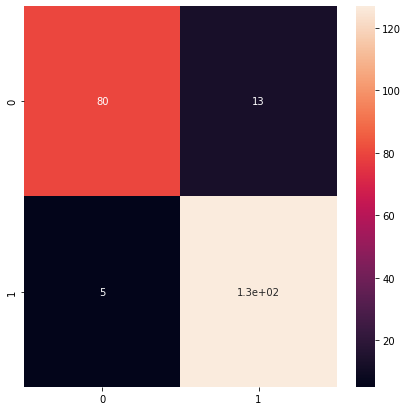

In [417]:
plt.figure(figsize=[7,7])
sb.heatmap(cm,annot=True)
plt.show()

# **Prediction by giving some random data**

In [418]:
data = np.array([[1,3,750,4,16,0,0]])
prediction = classifier.predict(data)
print(prediction)

[[1.]]
